\# Project Overview - Analyzing Workout and Health Data
ng
project_description = """
# 📊 **Project Overview: Analyzing Workout and Health Data** 📊

This project aims to analyze a dataset containing workout and health metrics of individuals. The focus is on understanding
relationships between various attributes, such as age, gender, workout types, calories burned, and body measurements.

We will explore the data through:
- Descriptive statistics.
- Visualizations such as histograms, bar charts, and correlation heatmaps.
- Uncovering trends and insights that can guide better workout plans and health strategies.

---

**Key Steps:**
1. **Data Cleaning**: Handle missing values and outliers.
2. **Descriptive Statistics**: Calculate basic statistics and distributions.
3. **Data Visualization**: Create visual representations of key data features.
4. **Correlation Analysis**: Understand relationships between different health metrics.
5. **Insights**: Draw conclusions based on the findings.

Let's beginkdown(project_description))


In [1]:
# Importing liprarys to analies and manuplation dataset

import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring worning if it's shown
import warnings
warnings.filterwarnings('ignore')


### **Reading or downlowding dataset**

In [2]:
 # Reading the file fo dataset

fname = 'gym_members_exercise_tracking1.csv'
data = pd.read_csv(fname)
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,NaN,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


In [3]:
# Show the 6 first raws

data.head(6)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,NaN,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


### **Data Quality Check**

In [4]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         3
Calories_Burned                  0
Workout_Type                     1
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
# To full in null value with the mean of Session column

a = data['Session_Duration (hours)'] = data['Session_Duration (hours)'].fillna(data['Session_Duration (hours)'].mean())
a.isnull().sum()

0

In [6]:
# To delete all null value in dataset

data = data.dropna()
data["Workout_Type"].isnull().sum()

0

In [7]:
data.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           45
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         148
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              770
dtype: int64

In [8]:
unique_gender_values = data['Workout_Type'].unique()
print(unique_gender_values)

['Yoga' 'HIIT' 'Cardio' 'Strength']


In [9]:
# Count the number of people for each workout type

workout_counts = data['Workout_Type'].value_counts()
print(workout_counts)

Workout_Type
Strength    257
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


In [10]:
# # Count the number of people for each workout type
grouped_by_workout = data.groupby('Workout_Type')['Gender'].value_counts()

print(grouped_by_workout)


Workout_Type  Gender
Cardio        Male      129
              Female    126
HIIT          Male      114
              Female    107
Strength      Male      134
              Female    123
Yoga          Male      133
              Female    106
Name: count, dtype: int64


In [11]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,38.694444,73.798560,1.722438,181.459877,143.752058,62.213992,1.257729,905.406379,24.978189,2.625926,3.320988,1.809671,24.899578
std,12.182370,21.146018,0.127709,22.122527,14.345209,7.325413,0.342359,272.781414,6.262485,0.600092,0.913257,0.740048,6.652790
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.620000,170.000000,131.000000,56.000000,1.040000,719.750000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,69.950000,1.710000,180.000000,143.000000,62.000000,1.265000,892.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.250000,85.925000,1.800000,190.000000,156.000000,68.000000,1.460000,1076.500000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.000000,470.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [12]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]



In [13]:
# Find the outlires values 

outliers = detect_outliers(data['Max_BPM'])
print("\n The outlyer in Max_BPM: ")
print(outliers)


 The outlyer in Max_BPM: 
12     350
18     420
28     350
374    470
962    400
965    411
972    400
Name: Max_BPM, dtype: int64


In [14]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr().sum()



Age                              0.831868
Weight (kg)                      2.437200
Height (m)                       1.337473
Max_BPM                          1.094042
Avg_BPM                          1.444806
Resting_BPM                      0.991244
Session_Duration (hours)         2.960188
Calories_Burned                  3.375178
Fat_Percentage                  -2.579526
Water_Intake (liters)            2.670843
Workout_Frequency (days/week)    2.688580
Experience_Level                 2.949802
BMI                              1.888479
dtype: float64

## Correlation and Visualization

<Axes: >

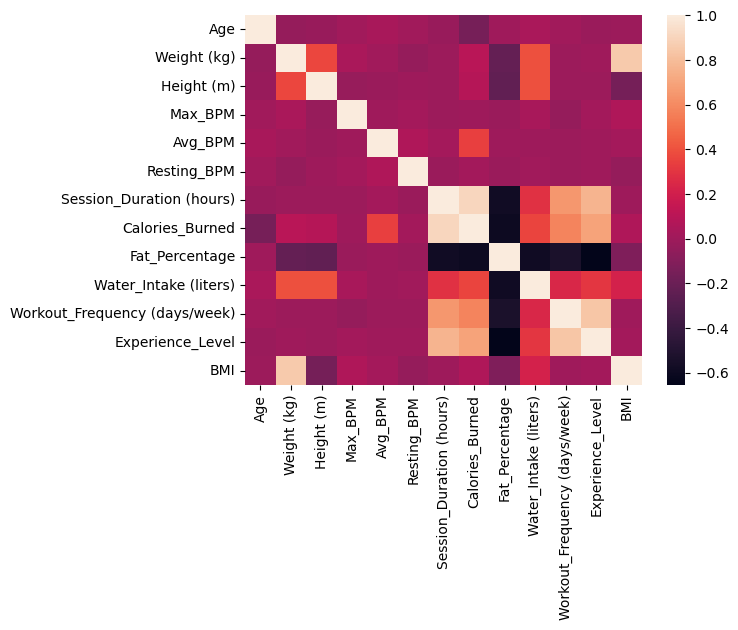

In [15]:
sns.heatmap(numeric_data.corr())

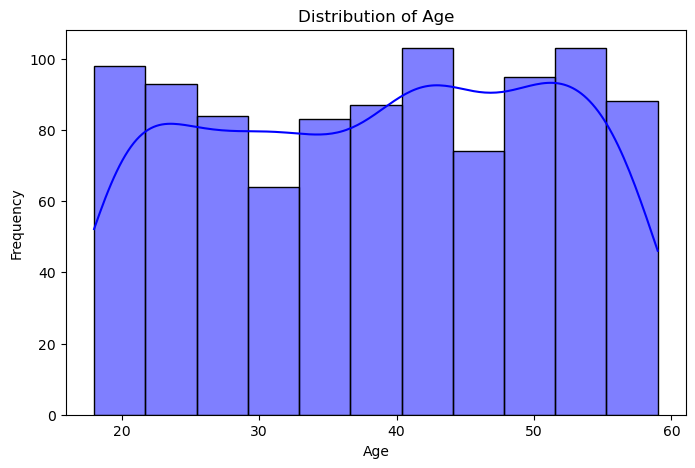

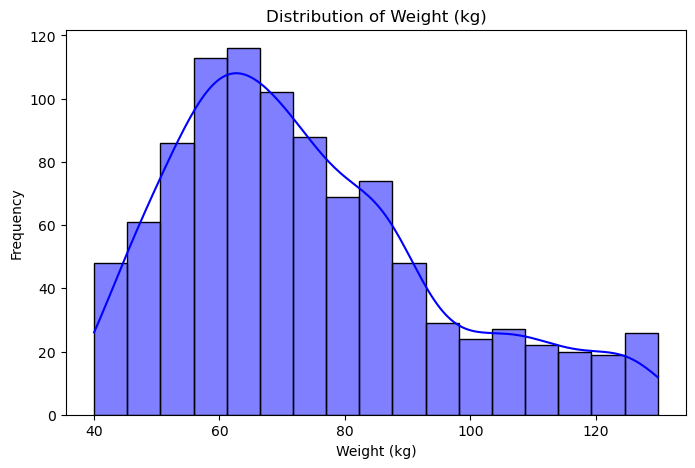

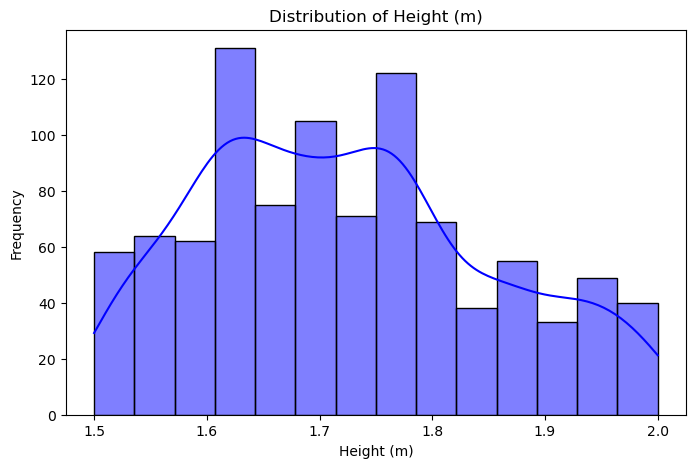

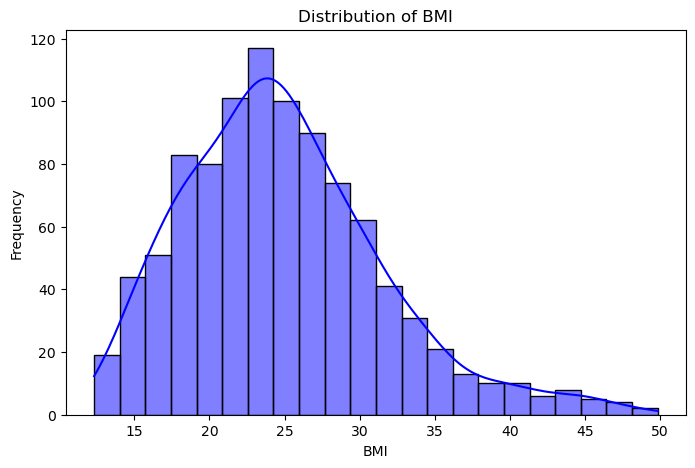

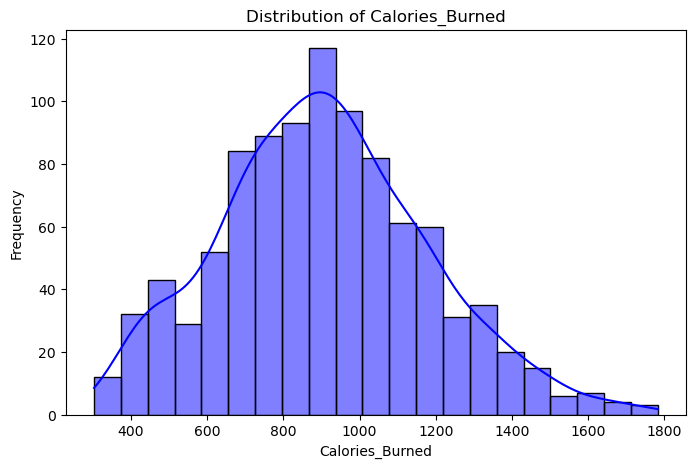

In [16]:

numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True,  color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

* **Most people who participate in training** are in their 20s.
* **Weight between 50 and 75** is the most common body weight.
* **The average height for All** is 1.72 m
* **The most common BMI** is between 20 to 30 kg/m^2
* **The average burned calories** is 905







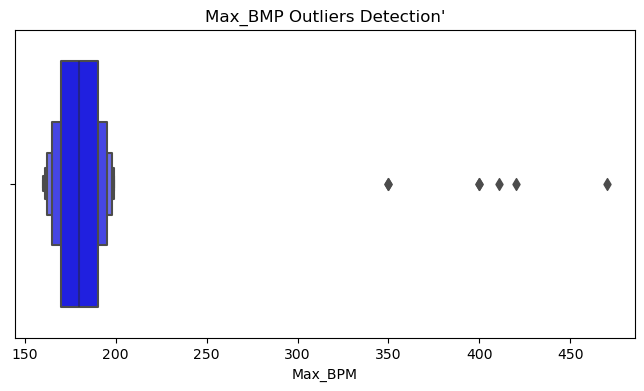

In [17]:

plt.figure(figsize = (8,4))
sns.boxenplot(x = data["Max_BPM"], color = 'blue')
plt.title("Max_BMP Outliers Detection'")
plt.show()

* **The avrage Maximum BPM (Beats Per Minute)** or heart rate is 181.5 BPM
* **The maximum is 470.0 BPM** which is indicated in the above plot for an outlier range between **350.0 and 47.0 BPM**


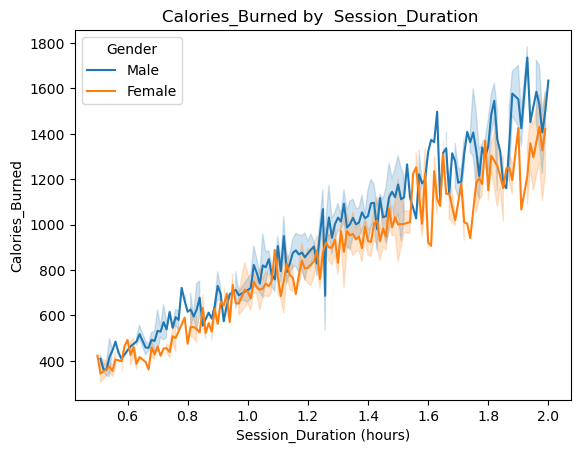

In [18]:

sns.lineplot(data ,x='Session_Duration (hours)',y='Calories_Burned',hue='Gender')
plt.title("Calories_Burned by  Session_Duration ")
plt.show()

 **The longer** the session duration, **the more calories burned**

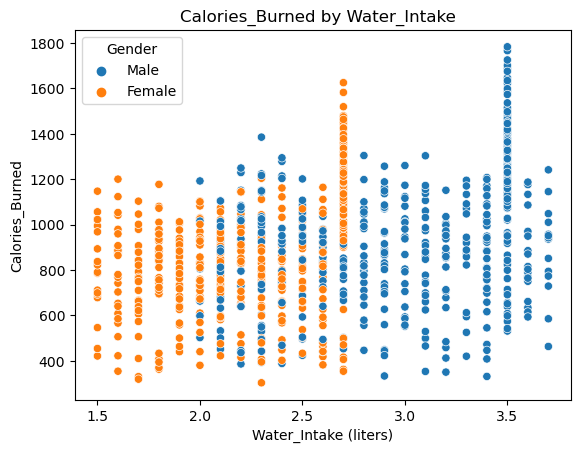

In [19]:
sns.scatterplot(data, x='Water_Intake (liters)',y='Calories_Burned',hue='Gender')
plt.title("Calories_Burned by Water_Intake  ")
plt.show()

In [20]:
#sns.scatterplot(data , x ="Session_Duration (hours)", y = "Calories_Burned", hue = "Workout_Type")
#plt.title("Calories_Burned by Session_Duration ")
#plt.show()

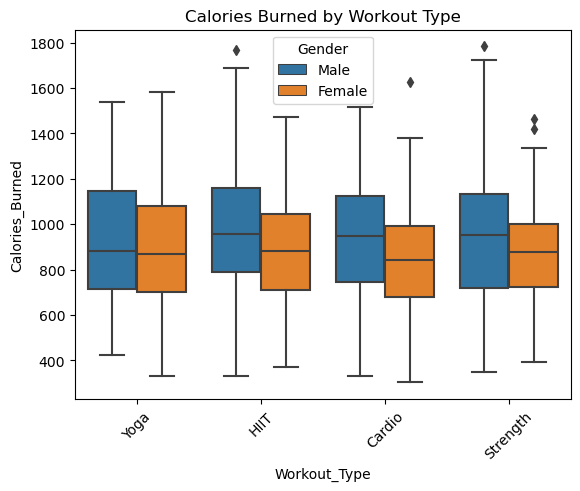

In [30]:
sns.boxplot(data=data, x='Workout_Type', y='Calories_Burned', hue='Gender')
plt.title('Calories Burned by Workout Type')
plt.xticks(rotation=45)
plt.show()

**Males burn more** calories **than females** in each workout type

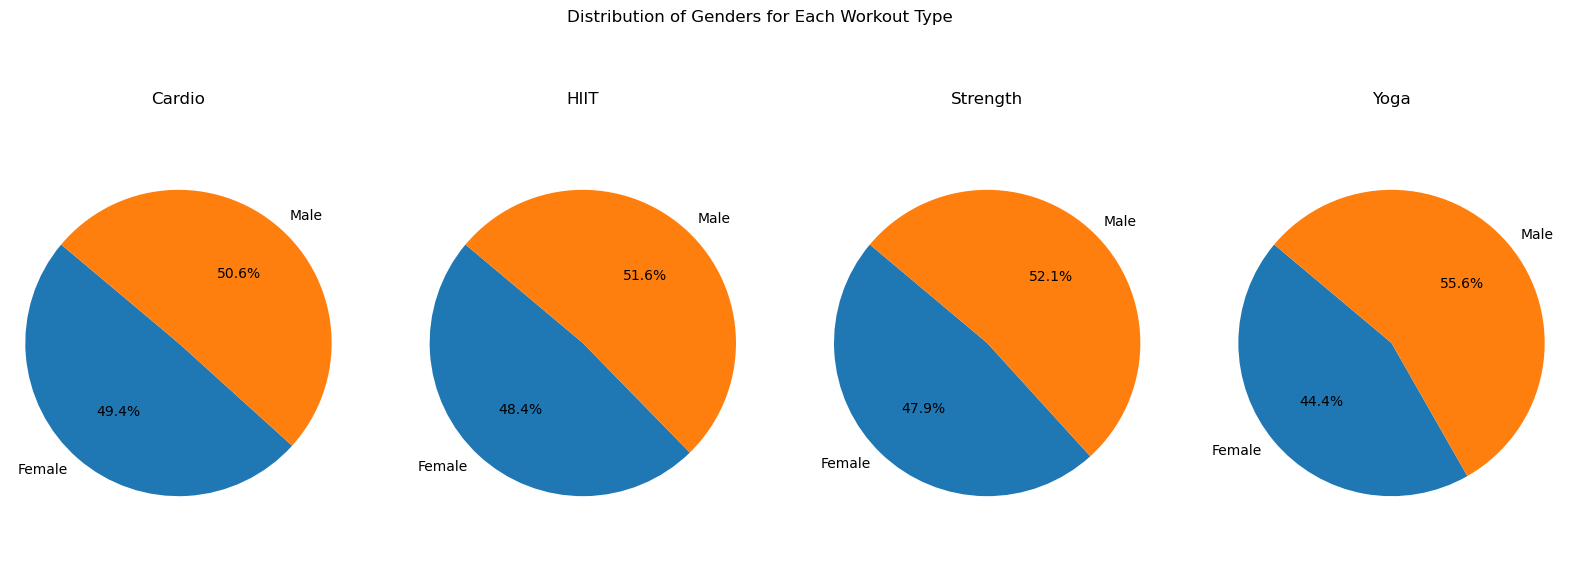

In [22]:


grouped_by_workout = data.groupby('Workout_Type')['Gender'].value_counts().unstack()

# Define the number of subplots based on the number of workout types
num_workout_types = len(grouped_by_workout.index)
fig, axes = plt.subplots(1, num_workout_types, figsize=(20, 6))

# Plot each workout type as a pie chart in a subplot
for i, workout_type in enumerate(grouped_by_workout.index):
    workout_data = grouped_by_workout.loc[workout_type]
    axes[i].pie(workout_data, labels=workout_data.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"{workout_type}")
    axes[i].axis('equal')

#plt.tight_layout()
plt.suptitle("Distribution of Genders for Each Workout Type", y=1.05)
plt.show()

:**The percentage of males** in each type of sport is **greater than the percentage of females**.

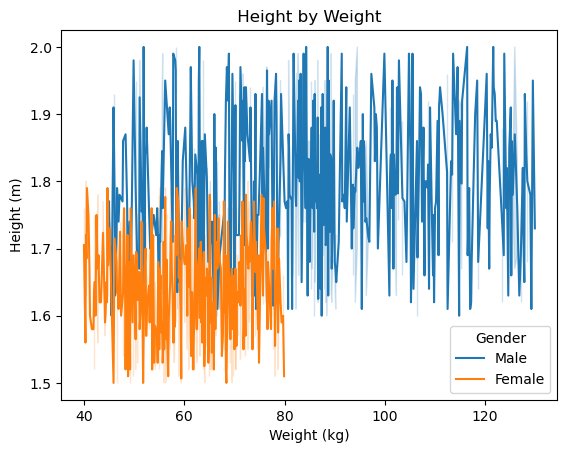

In [23]:
sns(data ,x='Weight (kg)',y='Height (m)',hue='Gender')
plt.title(" Height by Weight ")
plt.show()

**Males are higher** in weight and height **compared to females**.

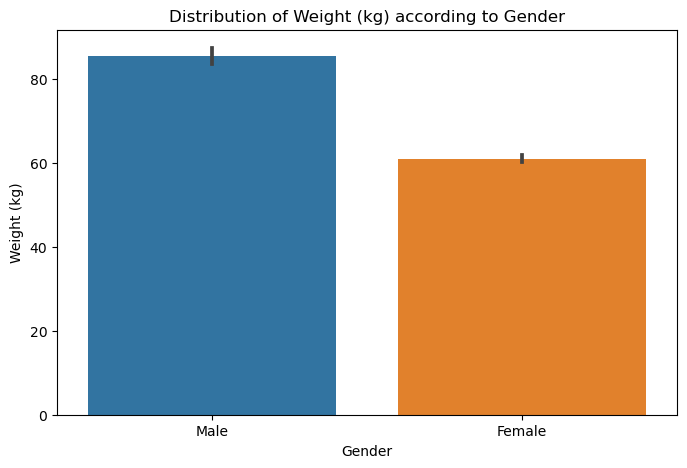

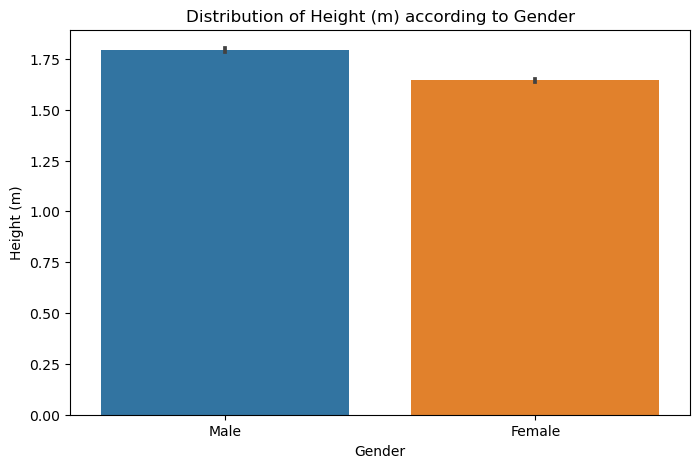

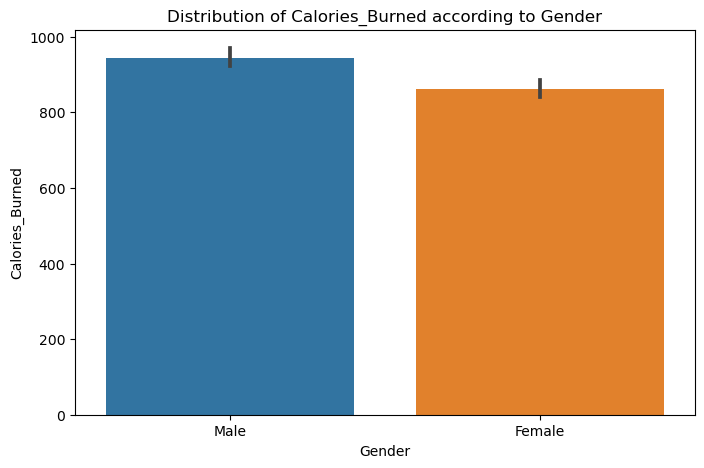

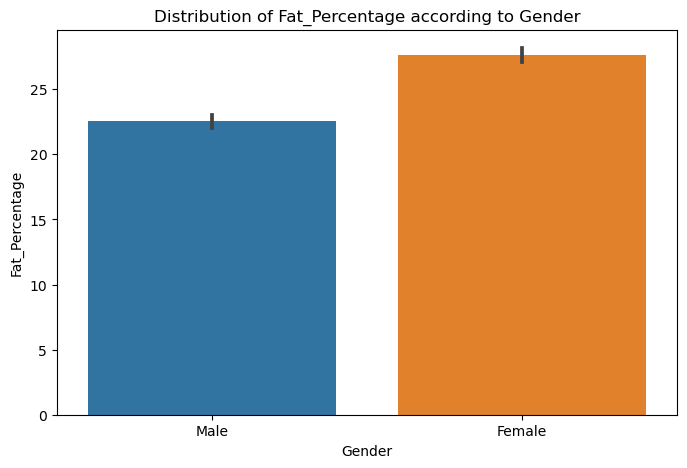

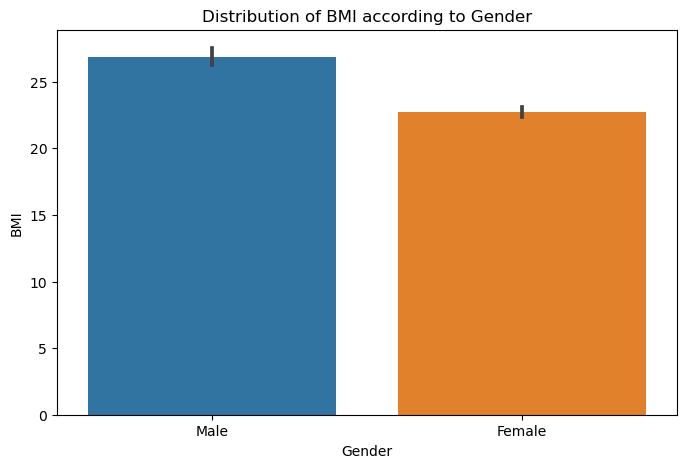

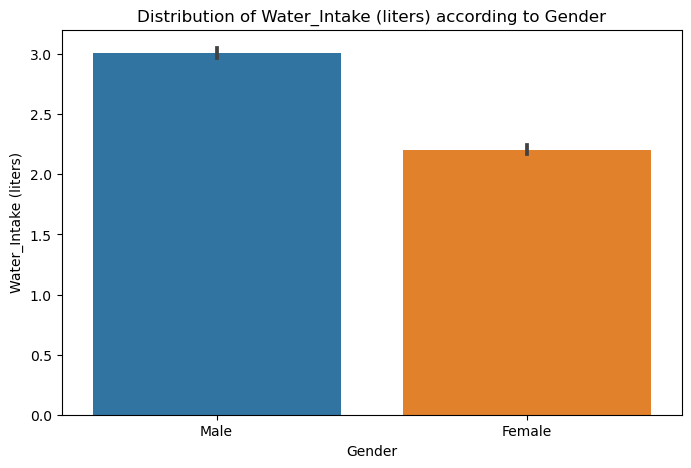

In [24]:
numerical_columns = [ 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Fat_Percentage' , 'BMI', 'Water_Intake (liters)']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Gender', y=col, data=data )
    plt.title(f"Distribution of {col} according to Gender")
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()



* **The average males weight is larger than female Significantly**.
* **The average males height is larger than female**, But the difference is close, not far apart as in weight.
* **Average burned calories of males is more than females**.
* **The percentage of fat in females is higher than in males due to the hormonal nature of females**.
* Because the average weight of a male is much greater than that of a female, and BMI is related to weight and inversely to the square of height (there is no significant difference between males and females in height), this explains why **the average BMI of males is greater than that of females.**
* individuals with **higher body weight and height may require more water** due to larger BMI and increased metabolic processes.


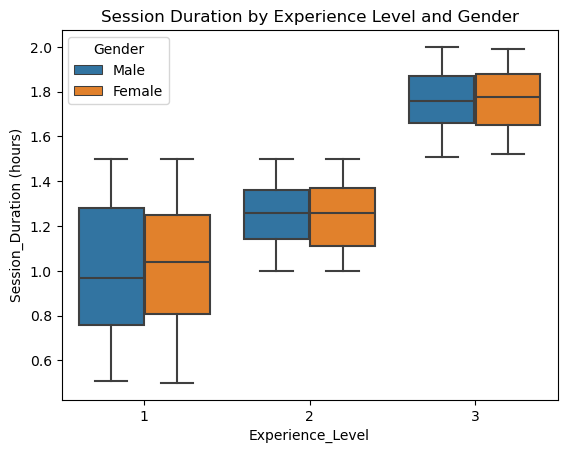

In [25]:
sns.boxplot(x='Experience_Level', y='Session_Duration (hours)', data=data, hue='Gender')
plt.title("Session Duration by Experience Level and Gender")
plt.show()


**Experience level 3** has the **longest session duraion**

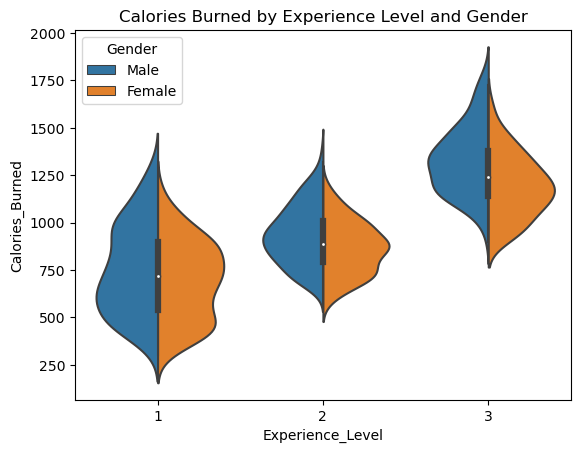

In [26]:
sns.violinplot(x='Experience_Level', y='Calories_Burned', data=data, hue='Gender', split=True)
plt.title("Calories Burned by Experience Level and Gender")
plt.show()


**Experience level 3 burns more calories** than level 1 & 2, The difference in burning between level 1 & 2 is small.

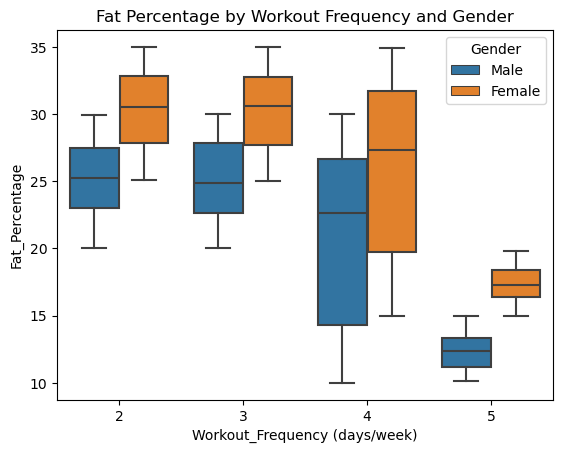

In [27]:

sns.boxplot(x='Workout_Frequency (days/week)', y='Fat_Percentage', data=data, hue='Gender')
plt.title("Fat Percentage by Workout Frequency and Gender")
plt.show()

**Those who train 5 days a week have the lowest body fat percentage** especially for males

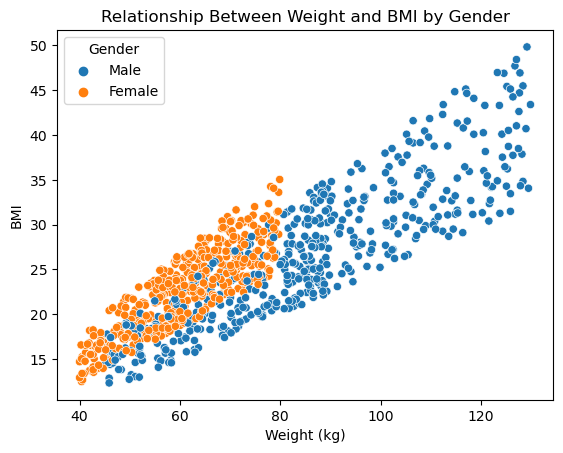

In [28]:
sns.scatterplot(x='Weight (kg)', y='BMI', data=data, hue='Gender')
plt.title('Relationship Between Weight and BMI by Gender')
plt.show()


We can see here that the **heavier a person** is, **the higher their BMI** will be.

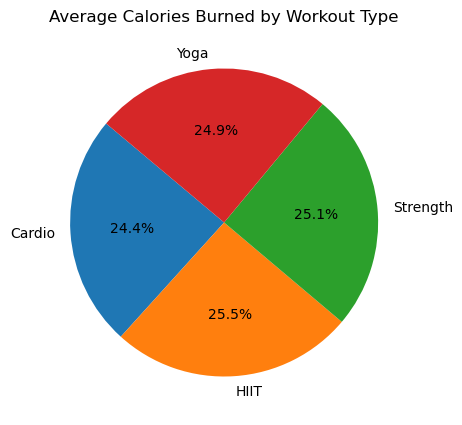

In [29]:
grouped_by_workout = data.groupby('Workout_Type')['Calories_Burned'].mean()

plt.figure(figsize=(5, 5))
grouped_by_workout.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Average Calories Burned by Workout Type")
plt.ylabel('') # This is to keep the plot clean in y axis
plt.show()

* **HIIT** is known for its reputation for **combining intense bursts of activity with short rest periods, maximizing calorie burn** in a shorter time frame.
* **Strength** closely follows HIIT indicates that building muscle through **resistance exercises not only increases strength but also contributes significantly to calorie expenditure**.
* **Yoga** Surprisingly **effective for calorie burn due to dynamic forms that increase heart rate** and engage multiple muscle groups.
* **Cardio** reliable for continuous calorie burning, making it ideal for steady weight loss and cardiovascular health.

* **HIIT**: Optimal for those **seeking intense, efficient workouts**.

* **Strength Training**: Ideal for **building muscle and boosting metabolism**.

* **Yoga**: Offers a balanced approach, **combining calorie burn with flexibility** and mental wellness.

* **Cardio**: Reliable for sustained **calorie burning and cardiovascular health**.